## A Hands-on Workshop series in Machine Learning
#### Instructor: Dr. Aashita Kesarwani

##### Image classification
A relatively recent success of neural networks that created a lot of interest in the field is image classification. A simple example is to build a network that can distinguish between cat and dog images.

Other than tabular data, the most fundamental types of data that we encounter are images and text. Both images and text have unique structural properties and the neural network architecture can be designed to make use of those properties.

If we were to use the images as inputs for the neural network, two questions arise:
* How do we convert these images into a form that can be fed into the network?
* Should we make some changes in the architecture of the network to make it more effective for image classification?

To answer the first question, let us first understand how computers interpret images. We will use the very popular [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) that consists of images of handwritten digits.

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')

2023-04-21 15:04:12.886195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


60000 train samples
10000 validation samples


Let us peek into the first training example of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

In [4]:
 X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

And it's label:

In [5]:
y_train[0]

5

Let us check the data-type of the examples(images) in the dataset.

In [6]:
type(X_train[0])

numpy.ndarray

The images are simply numpy arrays. Let us print one out.

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Images are made of pixels. Each element in the numpy array corresponds to a pixel in the image. The values for the grayscale ranges from $0$ to $255$ where:
* $0$ corresponds to pure black
* $255$ corresponds to pure white

In [7]:
X_train.min(), X_train.max()

(0, 255)

One of the ways to use these images as input for the Multi-layer Percpetron networks, also known as Fully Connected Networks, would be to **flatten** the numpy 2D arrays for images into a 1D vector. Let us first check the shape of the training set:

In [3]:
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28)


We convert each 28X28 images into a vector of length 784.

In [8]:
import numpy as np

X_train = X_train.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255

X_train_flattend = X_train.reshape(60000, 28*28)
X_valid_flattend = X_valid.reshape(10000, 28*28)

print('X_train shape:', X_train_flattend.shape)

X_train shape: (60000, 784)


We also encode the target variable $y$.

In [6]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)

We create a neural network with two hidden layers with 512 nodes and use ReLU activation and Dropout with probability of $0.2$. Since this is a multiclass classification, we use softmax function for the output layer with 10 nodes.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

# First hidden layer
model.add(Dense(512, input_shape=(784,), activation='relu'))                         
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(512, activation='relu'))  
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Next we compile and train the network:

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train_flattend, y_train,
          batch_size=128, epochs=10,
          verbose=0,
          validation_data=(X_valid_flattend, y_valid))

Finally, we test the model performance on the validation set:

In [12]:
loss, accu = model.evaluate(X_valid_flattend, y_valid, verbose=2)

print("Validation Loss:", loss)
print("Validation Accuracy:", accu)

Validation Loss: 0.06307290963101841
Validation Accuracy: 0.9836


The above network is giving very good performance on the validation set. It is to be noted that we set 512 nodes in both the hidden layers. The dimension ($28X28$) of images in our dataset is relatively small as compared to most images in the real-world. For images with more pixels, the size of input layer would increase considerably and the network will need more nodes in the hidden layers. Hence, the network can become computionally expensive pretty fast. On top of it, we would need more hidden layers to classify objects that are more complicated than digits, for example cat vs dog. This would further add to the computation and in practise does not give satisfactory performance. 

The above network **does not fully take into account the 2D spatial arrangement of the objects** in the images. Would it be possible to somehow modify the architecture of the neural networks to address these concerns?

To answer this question, we are going to digress a little.

The scientific discipline of computer vision is closely linked to the domain of Artificial Intelligence but developed independently of neural networks. Feature extraction, a starting point for many computer vision algorithms, involves detecting:
- Lines, edges and ridges
- Corners, blobs, etc.

For example, let us have a look at the following gif

![](https://ujwlkarn.files.wordpress.com/2016/08/giphy.gif?w=480&zoom=2)

In the above gif, two different kinds of features are extracted from the image:
* Lines slanting leftwards 
* Lines slanting rightwards

And how are the features extracted?

The entire image is scanned from left to right and top to bottom with a filter to detect the presence of the feature. The resulting image is called the **feature map**.

The mathematical process by which the filter creates a feature map is called **convolution**. It is simply an application of convolution operation that we study in math courses:

$$f*g (c) = \sum_{a=0}^c f(a)g(c-a)$$

For the convolution operation for images represented as matrices, the convolution operation with a filter (also known as kernel) is simply the elementwise multiplication followed by summation over the entire resulting matrix.

For this, first we take a part of the original image that matches in dimension with our filter. Then we multiply the corresponding elements of the two matrices and finally add them. This gives us one element for the resulting feature map. 

![](https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png)


Let us write the code for the convolution operation.   
Hints: For numpy 2D arrays:
* $A*B$ is used for elementwise multiplication
* [`np.sum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) is used to sum all the elements.

In [8]:
import numpy as np

def convolve(F, I):
    # F is filter matrix and I is image matrix
    n, m = F.shape
    N, M = I.shape
    C = np.zeros((N-n+1, M-m+1))
    # FILL IN THE FOLLOWING
    
    
    return C

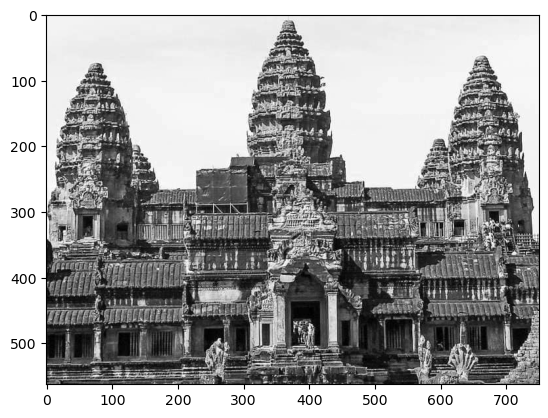

In [9]:
import matplotlib.image as mpimg
I = mpimg.imread("AngkorWat.jpg")

I = I[:, :, 1]/255

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(I, cmap='gray')
plt.show()

Let us apply the following filter to the above image of Angkor Wat and see what we get. 

$$\begin{equation*}
F = 
\begin{pmatrix}
5 & 5 & 5 \\
0 &0 & 0 \\
-5 & -5 & -5 
\end{pmatrix}
\end{equation*}$$

In [10]:
F = np.array([[5, 5, 5], [0, 0, 0], [-5, -5, -5]]) 
Ch = convolve(F, I)

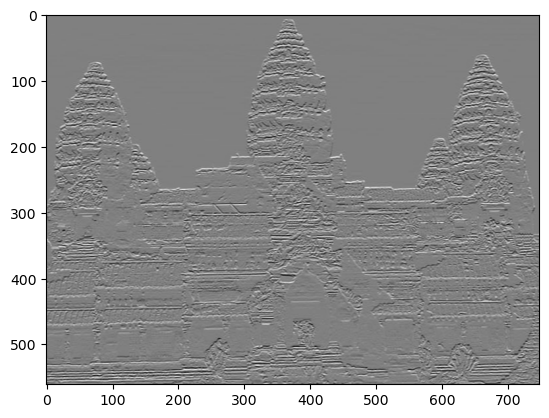

In [11]:
plt.imshow(Ch, cmap='gray')
plt.show()

Can you tell what feature the above filter is extracting?

Ans: The above filter detects the horizonal lines. 

How do we know this? Think of what sections of the image would give zero values in the result.

$$\begin{equation*}
F = 
\begin{pmatrix}
5 & 5 & 5 \\
0 &0 & 0 \\
-5 & -5 & -5 
\end{pmatrix}
\end{equation*}$$

Examples for zero resulting value for the convolution: 

$$\begin{equation*}
I_1 = \begin{pmatrix}
0 &0 & 0 \\
0 &0 & 0 \\
0 &0 & 0 \\
\end{pmatrix}
\quad
I_2= \begin{pmatrix}
30 &30 & 30 \\
30 &30 & 30 \\
30 &30 & 30 \\
\end{pmatrix}
\quad
I_3 = \begin{pmatrix}
5 &5 & 0 \\
5 &5 & 0 \\
5 &5 & 0 \\
\end{pmatrix}
\quad
I_4 = \begin{pmatrix}
5 &0 & 0 \\
0 &5 & 0 \\
0 &0 & 5 \\
\end{pmatrix}
\quad
I_5 = \begin{pmatrix}
0 &0 & 5 \\
0 &5 & 0 \\
5 &0 & 0 \\
\end{pmatrix}
\end{equation*}$$

Examples for non-zero resulting value for the convolution: 

$$\begin{equation*}
I_6 = \begin{pmatrix}
8 &8 & 8 \\
0 &0 & 0 \\
0 &0 & 0 \\
\end{pmatrix}
\quad
I_7 = \begin{pmatrix}
8 &8 & 8 \\
0 &0 & 0 \\
-8 &-8 & -8 \\
\end{pmatrix}
\quad
I_8 = \begin{pmatrix}
5 &6 & 5 \\
4 &5 & 3 \\
1 &1 & 1 \\
\end{pmatrix}
\end{equation*}$$
The filter matrix is designed so as to detect the change in the values along the horizontal line.

Can you come up with a filter to **detect the vertical lines** and use it on the above image?

In [13]:
F = np.array([[5, 0, -5], [5, 0, -5], [5, 0, -5]])# Fill Here  
Cv = convolve(F, I)

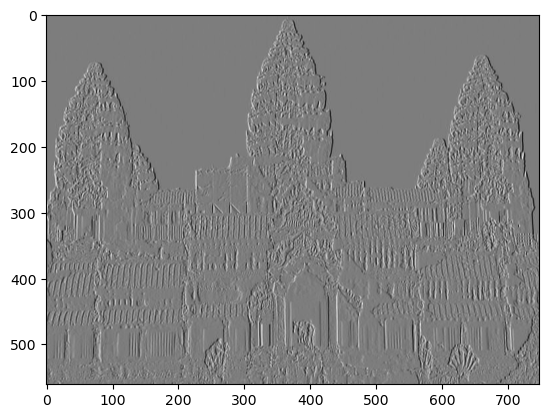

In [14]:
plt.imshow(Cv, cmap='gray')
plt.show()

Can you come up with a filter to **detect the 45 degree lines** in the architecture in the above image?

In [ ]:
F = np.array()# Fill Here  
Cl = convolve(F, I)

In [ ]:
plt.imshow(Cl, cmap='gray')
plt.show()

Can you come up with a filter to detect the edges in the architecture in the above image?

In [15]:
F = 
Cs = convolve(F, I)

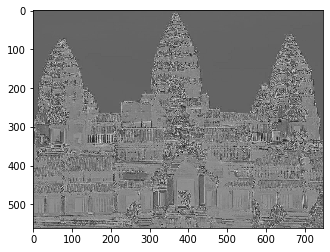

In [16]:
plt.imshow(Cs, cmap='gray')
plt.show()

Traditionally, such hand-picked features were then passed on to some classification algorithm to predict the label for the images.

It is tricky to come up with such filters to extract the features by trial-and-error. Wouldn't it be great if machines can themselves learn to extract the most useful features and then use them to classify images, similar to how our brain detects noses, eyes, ears, etc. to identify whether it is the face of a cat or a dog?

This is achieved by adding convolution layers in our neural network architecture.

### Convolutional Neural Networks (CNNs):

The convolution layers consists of the convolution filters that are used for feature extraction. We only specify the dimension of the filters and the network learns the values for the filters by itself in the training process, similar to how it learned the weights and bias. Such networks are called Convolutional Neural Networks (CNNs). 

There are three main types of layers in the architecture of Convolution Neural Network:
* Convolution layers
* Pooling layers
* Fully connected layers

Brief overview of the layers in the CNN architecture:
* The convolutional layers uses the convolution operation for feature exactration similar to what demonstrated above. 
* The pooling layers reduces the spatial dimension of the input. The resulting image usually have width and height half to that of the input image for that layer.  
* The convolutional and pooling layers are often stacked alternatively at the beginning of the network.
* The fully connected layers are simply the layers we learned earlier in the multi-layer perceptron (MLP). They are always put at the end of the network to classify the image using the feature maps generated in the earlier layers. 
* There is also a flatten layer that converts the output from the last convolution/pooling layer which is in the form of multidimensional array to a 1D vector which is then feed into the first fully connected layer. 
* CNNs often also use Dropout layers in their architectures.

<img src="https://miro.medium.com/max/2259/1*vkQ0hXDaQv57sALXAJquxA.jpeg" width=700 />


CNNs are very similar to the neural networks we studied earlier. All the concepts and tricks we learned about tuning the neural network still applies to CNNs. The main change is that CNN assumes that inputs are images and its architecture is designed to first perform feature learning followed by classification.

The earlier convolutional layers detect simpler features and the later ones detect more complex features. Hence, adding more layers in the networks can increase the performance of the network.


<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-12-58-30-pm.png?w=484&h=510" height=100 />

#### Convolution layers:
The convolution layers in the network simply consists of the filters, that are learned by the network using the training dataset. 
The following hyper-parameters along with the dimension of the input determines the dimension of the output of a convolution layer:
* Size of filters
* Strides
* Padding
* Number of filters

Note the difference between the parameters and the hyper-parameters. The **parameters such as weights, bias and the values in the filter matrix are learned by the network during the training phase** whereas the **hyper-parameters are to be decided at the architecture level**. The examples of hyper-parameters that were encountered before are the learning rate, the regularization parameter, the probability for keeping the nodes for Dropout, etc.

**Size of filters:**

It is common to use filters of the sizes $3X3$, $5X5$ or $7X7$ depending on the size of the input image. Smallers filters will likely detect smaller feature whereas bigger filters will likely detect features bigger in size. 

**Strides:**

In the convolution operation coded above, we were striding the filter from left to right and top to bottom by one unit each time. We can take bigger strides and it will result in downsizing the output. The convolutional layer with stride equal to $2$ is demonstrated in the following figure.

<img src="https://indoml.files.wordpress.com/2018/03/stride.png" width=600 />


**Padding:**

Sometimes, images are padded with zeros at the border before convolution is applied. With appropriate padding, each pixel can be given a chance to be at the center of a filter and hence, border pixels are treated similar to the other pixels while detecting features.

<img src="https://indoml.files.wordpress.com/2018/03/padding.png?w=594&h=308&zoom=2" width=500 />




#### RGB images
So far, we have only seen grayscale images that are of dimension $mXn$. An RBG image, also known as truecolor image, is of  dimension $mXnX3$, where there are 3 channels corresponding to red, blue and green colors. Any color can be encoded using these 3 channels:

Color	| Red number	| Green number	| Blue number|
--|--|--|--|
red	| 255|	0	|0 |
green | 0 | 255 | 0 |
blue | 0 | 0 | 255 |
purple |	255	| 0 |	255 |
yellow	| 255	| 255 |	0 |
black	| 0 |	0	| 0 |
white	| 255 |	255	|255 |
grey | 100 | 100 | 100 |


Please [refer here](https://web.stanford.edu/class/cs101/image-1-introduction.html) for a more detailed explanation.

The number of channels in the filter should match the number of channels in the input images. The convolution result from each channel is added to give the output that consists of a single channel.

<img src="https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png" width=500 />


**Number of filters:**

We can use more than one filter in a convolution layer. Each channel of the output corresponds to a filter and hence the depth of the output equals the number of filters. These channels are feature maps.

<img src="https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png" width=500 />


The convolutional layer as a whole comprise of multiple operations:
1. Convolutional operation using the filters
2. Adding the bias
3. Applying the activation function (usually ReLU)

<img src="https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png" width=600 />


#### Pooling layers:
For pooling, the input image is partitioned into disjoined regions of size ($m X n$) and one of the pooling operation is applied:
* Max pooling: We pick the maximum element in that region.
* Average pooling: We take the average of all elements in the region. 

<img src="https://indoml.files.wordpress.com/2018/03/pooling-layer3.png?w=624&h=185&zoom=2" width=600 />

The pooling layer reduces the height and width of the input volume. Thus, it saves the memory and computing power, and also helps remove the noise from images.  

Pooling keeps the number of channels constant if there are more than one.

<img src="https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png" width=300 />

There are no parameters for the network to learn for the pooling layer, but there are two hyper-parameters associated with each pooling layer:
* Size ($m X n$) of the disjoint regions, usually $2X2$
* Pooling type, e.g. max-pooling, average pooling

#### Fully connected layers:

The fully-connected layers are the ones used in the Multi-layer Perceptrons seen before. Each node in a fully-connected layer is connected to each node in the preceding and succeeding layers. The connecting weights are learning using the training data. Such layers are usually placed at the very end of CNNs and they are used for the purpose of classification using the features learned in the earliers layers.  The output from the earlier layers is **flattened** to a 1D vector and then feed into the fully-connected layers. 

<img src="https://miro.medium.com/max/2259/1*vkQ0hXDaQv57sALXAJquxA.jpeg" width=500 />


#### Implementation:
CNNs are easy-to-implement using Keras. Following is an example CNN for the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

batch_size = 128
num_classes = 10
epochs = 15

# Input image dimensions
img_rows, img_cols = X_train[0].shape

# Convert image into suitable dimensions
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Build and train the CNN
model = Sequential()

# First Convolution layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# Second Convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# First fully-connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid))

score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2405 - acc: 0.9267 - val_loss: 0.0557 - val_acc: 0.9833
Epoch 2/15
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0874 - acc: 0.9733 - val_loss: 0.0349 - val_acc: 0.9884
Epoch 3/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0651 - acc: 0.9800 - val_loss: 0.0358 - val_acc: 0.9886
Epoch 4/15
60000/60000 [==============================] - 60s 999us/step - loss: 0.0529 - acc: 0.9839 - val_loss: 0.0310 - val_acc: 0.9888
Epoch 5/15
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0460 - acc: 0.9861 - val_loss: 0.0301 - val_acc: 0.9899
Epoch 6/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0385 - acc: 0.9877 - val_loss: 0.0271 - val_acc: 0.9909
Epoch 7/15
60000/60000 [==============================] - 59s 984us/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0287 - val

### Acknowledgements:
The credits for the images used above are as follows:

- Image 1: https://cs.nyu.edu/~fergus/tutorials/deep_learning_cvpr12/
- Image 2, 5 to 11 : https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/
- Image 3 and 12: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
- Image 4: http://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf

The image for Angkor Wat temple used to test out the hand-picked filters is taken from the site: https://www.hollandamerica.com/en_US/shore-excursions/1010069/angkor-wat-overland-adventure-sihanoukville-to-phu-my-double.html